In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

C:\Users\Matheus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_all = pd.read_csv('final_data.csv')
data_nonan = data_all.dropna()
data_nocols = data_all.drop(columns = ['evaporation', 'sunshine', 'cloud9am', 'cloud3pm']).dropna()

> **Ordem dos modelos: -Logistic ---- SVM ----- KNN --- DecisionTree ---- RandomForest ----- Bagging ------ Stacking ----- LightGBM ---- XGBoost**

In [3]:
print(classification_report(data_all.raintomorrow, (data_all.modelo_vigente > 0.5)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    110316
           1       0.92      0.75      0.83     31877

    accuracy                           0.93    142193
   macro avg       0.93      0.87      0.89    142193
weighted avg       0.93      0.93      0.93    142193



# Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
std = StandardScaler()

#X_all = data_nonan.drop(columns = ['raintomorrow'])
X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow

#X_all_std = std.fit_transform(X_all)
X_std = std.fit_transform(X)
y_all = y

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

logistic = LogisticRegression(max_iter = 2000)
logistic.fit(X_std_train, y_train)
y_pred = logistic.predict(X_std_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     23329
           1       0.72      0.45      0.55      6569

    accuracy                           0.84     29898
   macro avg       0.79      0.70      0.73     29898
weighted avg       0.83      0.84      0.83     29898



In [6]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

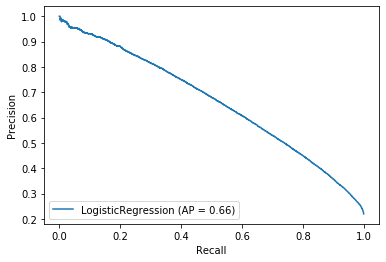

In [7]:
plot_precision_recall_curve(logistic, X_std, y)

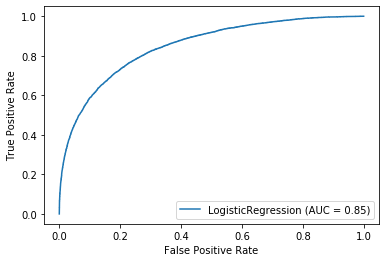

In [8]:
plot_roc_curve(logistic, X_std_test, y_test)

# SVC

In [13]:
from sklearn.svm import SVC


In [14]:
std = StandardScaler()

X_all = data_nocols.drop(columns = ['raintomorrow', 'modelo_vigente'])
# X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
#        'cloud3pm', 'temp9am', 'temp3pm', 'wind_speed9am',
#        'wind_speed3pm', 'latitude', 'longitude', 'altitude',
#        'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
#        'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
#        'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
#        'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
#        'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
#        'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
#        'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
#        'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
#        'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
#        'month_December', 'month_February', 'month_January', 'month_July',
#        'month_June', 'month_March', 'month_May', 'month_November',
#        'month_October', 'month_September']]
y = data_nocols.raintomorrow

X_all_std = std.fit_transform(X_all)
#X_std = std.fit_transform(X)
y_all = y

X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
#X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

svm_all = SVC(max_iter = 1000, gamma = 20)
svm_all.fit(X_all_std_train, y_all_train)
y_all_pred = svm_all.predict(X_all_std_test)

print(classification_report(y_all_test, y_all_pred))

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.86      0.24      0.37     23443
           1       0.24      0.86      0.37      6455

    accuracy                           0.37     29898
   macro avg       0.55      0.55      0.37     29898
weighted avg       0.73      0.37      0.37     29898



In [15]:
std = StandardScaler()

#X_all = data_nonan.drop(columns = ['raintomorrow'])
X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude']]
y = data_nocols.raintomorrow













#X_all_std = std.fit_transform(X_all)
X_std = X#std.fit_transform(X)
y_all = y

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

svc = SVC(max_iter = 2000)
svc.fit(X_std_train, y_train)
y_pred = svc.predict(X_std_test)

print(classification_report(y_test, y_pred))

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.96      0.24      0.38     23372
           1       0.26      0.96      0.41      6526

    accuracy                           0.40     29898
   macro avg       0.61      0.60      0.40     29898
weighted avg       0.80      0.40      0.39     29898



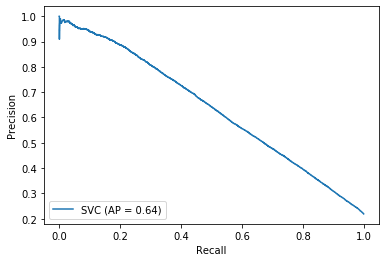

In [16]:
plot_precision_recall_curve(svc, X_std, y_all)

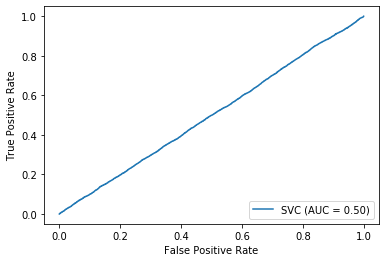

In [17]:
plot_roc_curve(svc, X_std_test, y_all_test)

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


KeyboardInterrupt: 

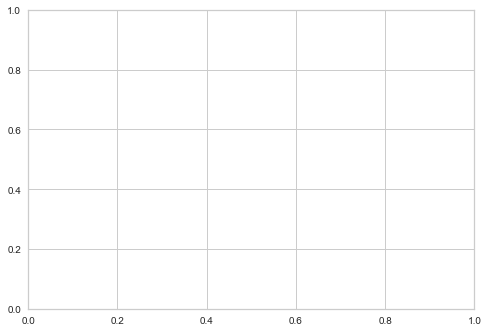

In [9]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(svm_all)

visualizer.fit(X_all_std, y_all)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figur

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
std = StandardScaler()

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow

X_std = std.fit_transform(X)

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

knn = KNeighborsClassifier(n_neighbors = 15, p =1000)
knn.fit(X_std_train, y_train)
y_pred = knn.predict(X_std_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     23481
           1       0.75      0.46      0.57      6417

    accuracy                           0.85     29898
   macro avg       0.81      0.71      0.74     29898
weighted avg       0.84      0.85      0.84     29898



In [11]:
std = StandardScaler()

X = data_nocols[['humidity3pm', 'pressure3pm',
       'temp3pm',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow

X_std = std.fit_transform(X)

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_std_train, y_train)
y_pred = knn.predict(X_std_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     23288
           1       0.77      0.45      0.57      6610

    accuracy                           0.85     29898
   macro avg       0.82      0.71      0.74     29898
weighted avg       0.84      0.85      0.83     29898



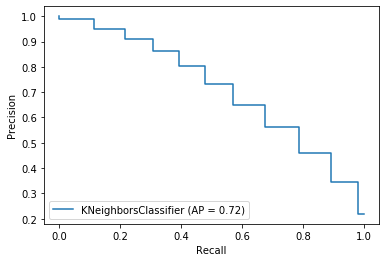

In [12]:
plot_precision_recall_curve(knn, X_std, y)

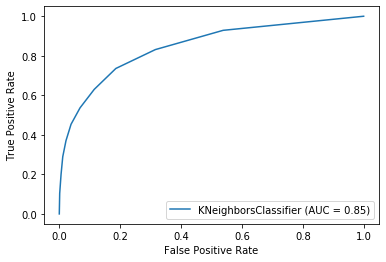

In [13]:
plot_roc_curve(knn, X_std_test, y_test)

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     23302
           1       0.73      0.48      0.58      6596

    accuracy                           0.85     29898
   macro avg       0.80      0.71      0.74     29898
weighted avg       0.84      0.85      0.83     29898



In [17]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow














#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth = 8)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     23375
           1       0.72      0.47      0.57      6523

    accuracy                           0.85     29898
   macro avg       0.79      0.71      0.74     29898
weighted avg       0.83      0.85      0.83     29898



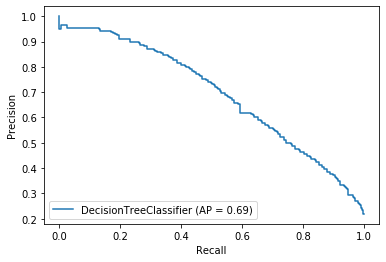

In [18]:
plot_precision_recall_curve(tree, X, y)

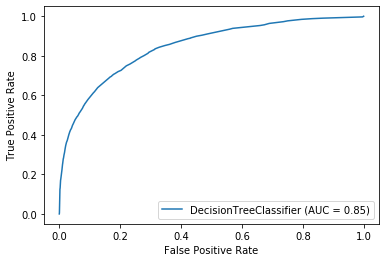

In [19]:
plot_roc_curve(tree, X_test, y_test)

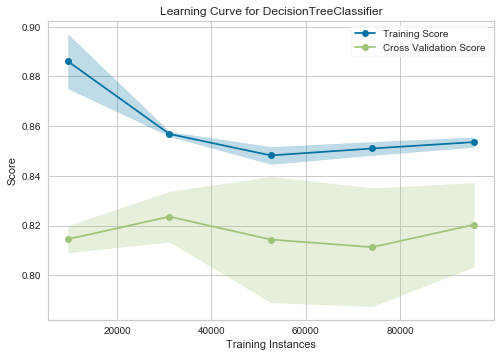

In [162]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(tree)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figur

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier

In [21]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = RandomForestClassifier(n_estimators= 200,  min_samples_leaf= 200, n_jobs = -1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     23405
           1       0.77      0.43      0.55      6493

    accuracy                           0.85     29898
   macro avg       0.81      0.70      0.73     29898
weighted avg       0.84      0.85      0.83     29898



In [22]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

forest = RandomForestClassifier(n_estimators= 200, max_depth=9, n_jobs = -1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     23375
           1       0.78      0.45      0.57      6523

    accuracy                           0.85     29898
   macro avg       0.82      0.71      0.74     29898
weighted avg       0.84      0.85      0.84     29898



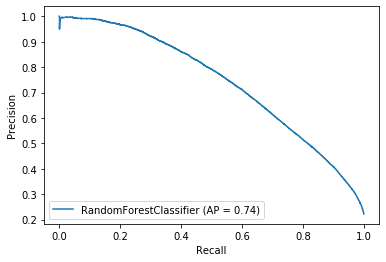

In [23]:
plot_precision_recall_curve(forest, X, y)

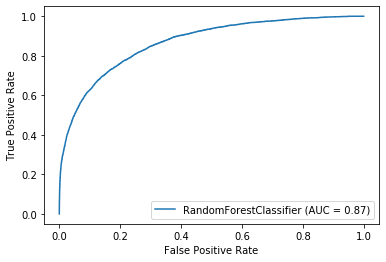

In [24]:
plot_roc_curve(forest, X_test, y_test)

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


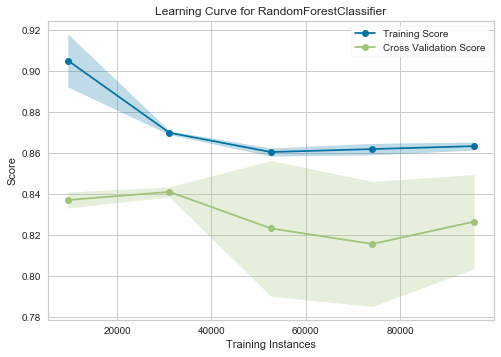

In [171]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(forest)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figur

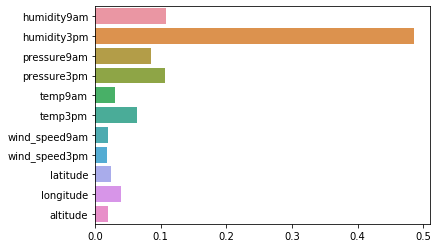

In [25]:
sns.barplot(forest.feature_importances_, X.columns)

# LightGBM

In [5]:
from lightgbm import LGBMClassifier, plot_importance

In [6]:

X = data_all[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_all.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

light = LGBMClassifier(n_estimators=200, min_child_samples=200, colsample_bytree=0.2, max_depth=9, importance_type='gain')
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     27529
           1       0.76      0.46      0.58      8020

    accuracy                           0.85     35549
   macro avg       0.81      0.71      0.74     35549
weighted avg       0.84      0.85      0.83     35549



In [36]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

light = LGBMClassifier(n_estimators=200, min_child_samples=200, colsample_bytree=0.2, max_depth=9)
light.fit(X_train, y_train)
y_pred = light.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     23239
           1       0.77      0.48      0.59      6659

    accuracy                           0.85     29898
   macro avg       0.82      0.72      0.75     29898
weighted avg       0.85      0.85      0.84     29898



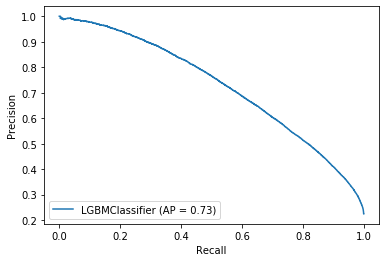

In [135]:
plot_precision_recall_curve(light, X, y)

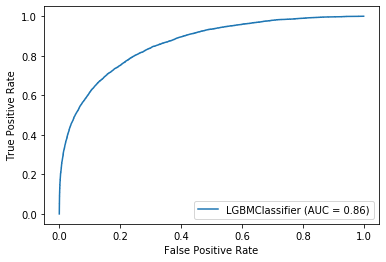

In [136]:
plot_roc_curve(light, X_test, y_test)

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


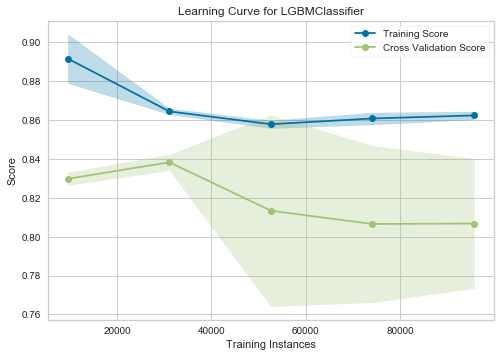

In [196]:
from yellowbrick.model_selection import LearningCurve

fig, ax = plt.subplots()
visualizer = LearningCurve(light, ax = ax)

visualizer.fit(X, y)        # Fit the data to the visualizer
ax.ylim = (0,1)
visualizer.show()           # Finalize and render the figur

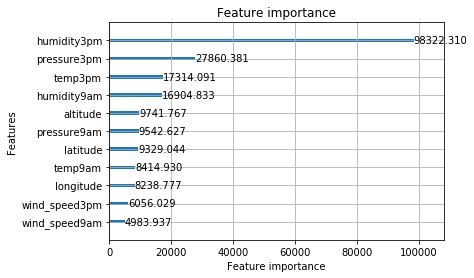

In [137]:
plot_importance(light, importance_type = 'gain', max_num_features=15)

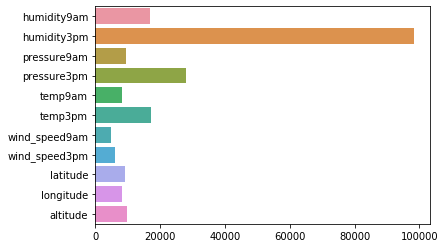

In [138]:
sns.barplot(light.feature_importances_, X.columns)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     23366
           1       0.76      0.48      0.59      6532

    accuracy                           0.85     29898
   macro avg       0.82      0.72      0.75     29898
weighted avg       0.85      0.85      0.84     29898



In [42]:
print(classification_report(y_train, light.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     70037
           1       0.79      0.50      0.62     19655

    accuracy                           0.86     89692
   macro avg       0.83      0.73      0.77     89692
weighted avg       0.86      0.86      0.85     89692



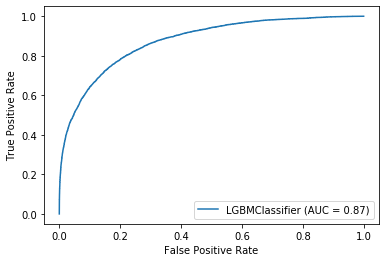

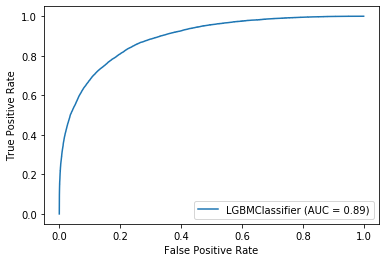

In [43]:
plot_roc_curve(light, X_test, y_test)
plot_roc_curve(light, X_train, y_train)

In [33]:
from sklearn.metrics import recall_score

In [37]:
for i in range(5, 100, 5):
    print(i/100, '\n')
    print('dias errados que nao choveu:', 365*0.78 -(365*0.78*recall_score(y_test, light.predict_proba(X_test)[:,1] > i/100, pos_label = 0)) )
    print('dias errados que choveu:', 365*0.22 -(365*0.22*recall_score(y_test, light.predict_proba(X_test)[:,1] > i/100)) )
    print(classification_report(y_test, light.predict_proba(X_test)[:,1] > i/100), '\n\n----------------------------')
    

0.05 

dias errados que nao choveu: 189.1057790782736
dias errados que choveu: 1.7847124192821724
              precision    recall  f1-score   support

           0       0.98      0.34      0.50     23239
           1       0.30      0.98      0.46      6659

    accuracy                           0.48     29898
   macro avg       0.64      0.66      0.48     29898
weighted avg       0.83      0.48      0.49     29898
 

----------------------------
0.1 

dias errados que nao choveu: 121.76226601833125
dias errados que choveu: 6.342964409070433
              precision    recall  f1-score   support

           0       0.96      0.57      0.72     23239
           1       0.38      0.92      0.54      6659

    accuracy                           0.65     29898
   macro avg       0.67      0.75      0.63     29898
weighted avg       0.83      0.65      0.68     29898
 

----------------------------
0.15 

dias errados que nao choveu: 84.61736305348768
dias errados que choveu: 11.4076888

dias errados que nao choveu: 0.06125478721116906
dias errados que choveu: 75.68145367172248
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     23239
           1       0.99      0.06      0.11      6659

    accuracy                           0.79     29898
   macro avg       0.89      0.53      0.49     29898
weighted avg       0.83      0.79      0.71     29898
 

----------------------------


In [21]:
365 * (1-0.22418121848473554), 365 * 0.22418121848473554

(283.1738552530715, 81.82614474692848)

In [22]:
365 * (1-0.22418121848473554) *0.8

226.53908420245722

In [23]:
365 * (1-0.22418121848473554) - (365 * (1-0.22418121848473554) *0.8)

56.63477105061429

In [25]:
365 * 0.22418121848473554 * 0.8

65.46091579754278

In [24]:
365 * 0.22418121848473554 - (365 * 0.22418121848473554 * 0.8)

16.365228949385696

In [57]:
15*100/365

4.109589041095891

In [107]:
from sklearn.ensemble import StackingClassifier

In [56]:
X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',]]
y = data_nocols.raintomorrow

X = std.fit_transform(X)
#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

stack = StackingClassifier([('LogisticRegression', logistic), ('DecisionTreeClassifier', tree), ('RandomForest', forest), ('KNeighborsClassifier', knn), ('LGBMClassifier', light)])
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     23407
           1       0.76      0.51      0.61      6491

    accuracy                           0.86     29898
   macro avg       0.82      0.73      0.76     29898
weighted avg       0.85      0.86      0.85     29898



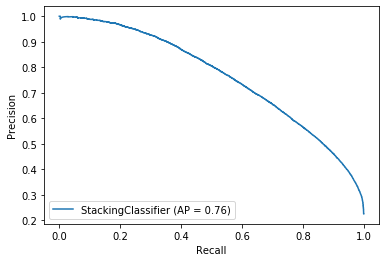

In [58]:
plot_precision_recall_curve(stack, X, y)

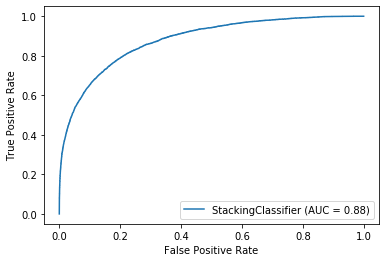

In [59]:
plot_roc_curve(stack, X_test, y_test)

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\l

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\l

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\l

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matheus\Anaconda3\l

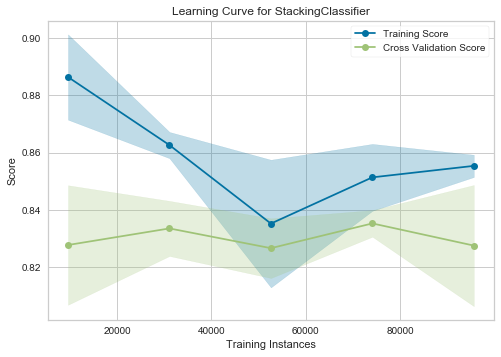

In [209]:
fig, ax = plt.subplots()
visualizer = LearningCurve(stack, ax = ax)

visualizer.fit(X, y)        # Fit the data to the visualizer
ax.ylim = (0,1)
visualizer.show()           # Finalize and render the figur

In [222]:
for i in range(5, 100, 5):
    print(i/100, '\n')
    print(classification_report(y_test, stack.predict_proba(X_test)[:,1] > i/100), '\n\n----------------------------')

0.05 

              precision    recall  f1-score   support

           0       0.99      0.08      0.15     23306
           1       0.24      1.00      0.38      6592

    accuracy                           0.28     29898
   macro avg       0.61      0.54      0.27     29898
weighted avg       0.83      0.28      0.20     29898
 

----------------------------
0.1 

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     23306
           1       0.42      0.88      0.57      6592

    accuracy                           0.71     29898
   macro avg       0.69      0.77      0.68     29898
weighted avg       0.84      0.71      0.73     29898
 

----------------------------
0.15 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85     23306
           1       0.51      0.79      0.62      6592

    accuracy                           0.79     29898
   macro avg       0.72      0.79      0.74   

In [90]:
light.predict_proba(data_all[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']])[:,1]

array([0.10607778, 0.10247107, 0.09541489, ..., 0.00962204, 0.016918  ,
       0.0176117 ])

In [71]:
data_all['new_model'] = (light.predict_proba(data_all[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude']])[:,1])

In [72]:
data_all['new_model'] = [1 if x > 0.2 else 0 for x in data_all['new_model']]

In [73]:
data_all['teste'] = data_all['new_model'] + data_all['raintomorrow']

In [96]:
teste = pd.DataFrame(data_all['new_model'])
teste['raintomorrow'] = data_all['raintomorrow']
teste.drop([0, 142192], inplace = True)

In [102]:
teste['amountOfRain'] = [data_all.loc[i, 'rainfall'] for i in range(1,142192)]

In [106]:
teste['teste'] = teste['new_model'] + teste['raintomorrow']

In [107]:
teste['amountOfRain'][data_all['teste'] == 1]

4          1.0
8          0.0
10         0.0
13         3.6
20         0.0
          ... 
142058     0.2
142059     0.4
142125     6.8
142126    12.6
142127    34.6
Name: amountOfRain, Length: 36674, dtype: float64

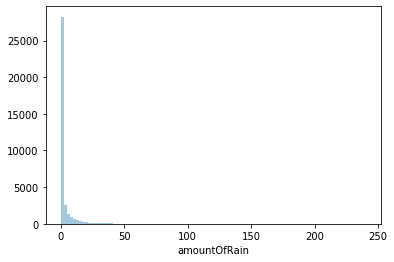

In [124]:
sns.distplot(teste['amountOfRain'][teste['teste'] == 1].dropna(), bins = 100, kde = False)

In [121]:
teste[(teste['teste'] == 1) & (teste['amountOfRain'] > 1)].describe()

,new_model,raintomorrow,amountOfRain,teste
count,10386.000000,10386.000000,10386.000000,10386.0
mean,0.891103,0.108897,9.323108,1.0
std,0.311524,0.311524,13.407750,0.0
min,0.000000,0.000000,1.100000,1.0
25%,1.000000,0.000000,2.400000,1.0
50%,1.000000,0.000000,5.000000,1.0
75%,1.000000,0.000000,11.000000,1.0
max,1.000000,1.000000,240.000000,1.0


In [116]:
5059*15/142192

0.5336798132103072

In [3]:
data_all[data_all['rainfall'] > 240]

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
9236,17.4,23.1,371.0,NaN,3.5,93.0,81.0,1026.6,1025.9,8.0,...,0,0,0,0,0,0,0,1,0,0
84897,22.3,27.4,278.4,NaN,0.0,96.0,98.0,1003.5,999.6,8.0,...,0,0,1,0,0,0,0,0,0,0
85650,22.9,29.9,268.6,NaN,2.0,82.0,84.0,1011.1,1009.3,6.0,...,0,1,0,0,0,0,0,0,0,0
87022,23.8,31.0,247.2,NaN,2.0,100.0,74.0,1014.2,1011.4,8.0,...,0,1,0,0,0,0,0,0,0,0
136881,22.1,25.6,367.6,NaN,0.0,98.0,98.0,996.3,996.0,8.0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
aaa = pd.read_csv('./data/rain_data_aus.csv')

In [20]:
31877/len(aaa)

0.22418121848473554

In [6]:
aaa[aaa['rainfall'] >= '240']

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
9236,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,93.0,81.0,1026.6,...,18.6,22.0,Yes,4.8,Yes,29.72,99.2,17,16.644599,0.775341
16920,2015-04-23,Newcastle,NaN,21.7,240.0,NaN,NaN,72.0,62.0,NaN,...,17.5,21.0,Yes,0.4,No,28.04,76.4,4,4.437905,0.388403
84897,2009-01-12,Cairns,22.3,27.4,278.4,NaN,0.0,96.0,98.0,1003.5,...,24.7,25.3,Yes,140.2,Yes,34.88,119.6,11,4.290216,0.995406
85650,2011-02-04,Cairns,22.9,29.9,268.6,NaN,2.0,82.0,84.0,1011.1,...,29.8,28.0,Yes,13.2,Yes,37.88,102.8,10,3.498299,0.900143
87022,2015-02-08,Cairns,23.8,31.0,247.2,NaN,2.0,100.0,74.0,1014.2,...,25.3,30.0,Yes,85.4,Yes,39.20,90.8,12,12.610848,0.625071
136881,2011-02-16,Darwin,22.1,25.6,367.6,NaN,0.0,98.0,98.0,996.3,...,24.3,23.5,Yes,184.6,Yes,32.72,119.6,12,6.647799,0.992183


In [10]:
aaa.loc[16915:].head(10)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
16915,2015-04-16,Newcastle,16.5,31.2,0.2,NaN,NaN,71.0,40.0,NaN,...,22.0,30.5,No,0.0,No,39.44,50.0,13,5.529332,0.147482
16916,2015-04-17,Newcastle,19.7,25.2,0.0,NaN,NaN,79.0,80.0,NaN,...,23.5,23.4,No,0.0,No,32.24,98.0,11,10.497679,0.438362
16917,2015-04-18,Newcastle,17.8,25.5,0.0,NaN,NaN,97.0,64.0,NaN,...,19.9,25.0,No,4.0,Yes,32.60,78.8,8,14.209378,0.355793
16918,2015-04-19,Newcastle,16.8,23.3,4.0,NaN,NaN,88.0,66.0,NaN,...,19.3,20.3,Yes,3.0,Yes,29.96,81.2,9,10.417186,0.382995
16919,2015-04-22,Newcastle,NaN,19.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,240.0,Yes,25.64,NaN,8,2.562583,0.385529
16920,2015-04-23,Newcastle,NaN,21.7,240.0,NaN,NaN,72.0,62.0,NaN,...,17.5,21.0,Yes,0.4,No,28.04,76.4,4,4.437905,0.388403
16921,2015-04-24,Newcastle,13.6,26.2,0.4,NaN,NaN,87.0,50.0,NaN,...,17.0,26.0,No,0.2,No,33.44,62.0,10,5.769862,0.108375
16922,2015-04-25,Newcastle,14.2,25.5,0.2,NaN,NaN,NaN,46.0,NaN,...,19.2,25.0,No,11.6,Yes,32.60,57.2,6,19.438036,0.141083
16923,2015-04-26,Newcastle,11.2,18.7,11.6,NaN,NaN,78.0,57.0,NaN,...,13.9,18.2,Yes,0.0,No,24.44,70.4,8,-4.750980,0.451105
16924,2015-04-27,Newcastle,10.6,20.5,0.0,NaN,NaN,64.0,51.0,NaN,...,16.2,19.5,No,0.0,No,26.60,63.2,9,5.071714,0.079041


In [ ]:
LGBMClassifier()

In [9]:
search = [{'max_depth': [i for i in range(15)], 'n_estimators': [i for i in range(100, 501, 100)]}]

In [10]:
from sklearn.model_selection import GridSearchCV, KFold

In [11]:
grid = GridSearchCV(light, search, cv = KFold(3), n_jobs = -1, verbose = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     27529
           1       0.76      0.46      0.58      8020

    accuracy                           0.85     35549
   macro avg       0.81      0.71      0.74     35549
weighted avg       0.84      0.85      0.83     35549



In [13]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  8.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.2,
                                      importance_type='gain', learning_rate=0.1,
                                      max_depth=9, min_child_samples=200,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=200,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [17]:
grid.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     27529
           1       0.75      0.49      0.59      8020

    accuracy                           0.85     35549
   macro avg       0.81      0.72      0.75     35549
weighted avg       0.84      0.85      0.84     35549

